In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
Sim_res = Path.cwd().parent.parent / 'MagnetCode' / "Simulation Results"
Photos_dir = Path.cwd() / 'Images'
from scipy.optimize import minimize

# Сбор статистики

In [33]:
DIR = Sim_res.parent / 'IsingTriangle' / 'Результаты 100-600'

In [34]:
DIR.exists()

True

In [37]:
dataset = list(DIR.glob('BC*.txt'))
print(*dataset, sep='\n')

C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.000000_0.000000_100_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.000000_0.000000_300_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.000000_0.000000_600_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.100000_0.000000_100_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.100000_0.000000_300_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.100000_0.000000_600_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.200000_0.000000_100_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.200000_0.000000_300_0.txt
C:\Users\Admin\Documents\Github\MagnetCode\IsingTriangle\Результаты 100-600\BC_Tri_0.200000_0.000000_600_0.txt
C

In [42]:
full_data = None
for d in dataset:
    data = pd.read_csv(d, sep=' ', index_col=False)
    if full_data is None:
        full_data = data
    else:
        full_data = pd.concat([full_data, data], ignore_index=True)

full_data.sort_values(by=['J', 'N'], inplace=True)

In [43]:
full_data

,N,J,h,mean_R_sq,err_mean_R_sq,mean_R_gyr_sq,err_mean_R_gyr_sq,mean_e,err_mean_e,mean_e_sq,err_mean_e_sq,mean_e_fourth,err_mean_e_fourth,mean_m,err_mean_m,mean_m_sq,err_mean_m_sq,mean_m_fourth,err_mean_m_fourth,Unnamed: 19
0,100,0.0,0,929,35,96.8226,0.057610,-0.000050,0.000199,0.024398,0.000035,0.001924,7.501960e-06,0.079668,0.000060,0.010019,0.000013,0.000299,9.058660e-07,105200000000
1,300,0.0,0,4910,73,486.1900,0.358418,-0.000024,0.000089,0.006794,0.000010,0.000143,4.982520e-07,0.046045,0.000051,0.003335,0.000006,0.000033,1.204110e-07,105900000000
2,600,0.0,0,13924,120,1354.8600,1.132870,-0.000006,0.000035,0.003129,0.000002,0.000030,5.030990e-08,0.032560,0.000014,0.001667,0.000001,0.000008,1.528970e-08,482200000000
3,100,0.1,0,925,33,96.3550,0.068653,-0.163649,0.000179,0.055868,0.000100,0.008602,4.158540e-05,0.093606,0.000074,0.013780,0.000021,0.000562,1.830520e-06,95900000000
4,300,0.1,0,4879,75,483.3700,0.495968,-0.165075,0.000096,0.035449,0.000034,0.002332,4.750530e-06,0.054102,0.000043,0.004597,0.000007,0.000063,2.240860e-07,100200000000
5,600,0.1,0,13825,123,1345.5400,0.914906,-0.165260,0.000041,0.031098,0.000014,0.001420,1.210690e-06,0.038335,0.000016,0.002309,0.000002,0.000016,2.791880e-08,502200000000
6,100,0.2,0,900,34,94.1775,0.064067,-0.364313,0.000209,0.167412,0.000177,0.050397,1.084160e-04,0.113735,0.000089,0.020283,0.000032,0.001210,4.497230e-06,99600000000
7,300,0.2,0,4748,79,470.6840,0.385210,-0.368083,0.000120,0.145457,0.000088,0.026894,3.231000e-05,0.065837,0.000065,0.006800,0.000013,0.000138,5.981930e-07,101100000000
8,600,0.2,0,13440,119,1311.1700,1.082750,-0.369103,0.000049,0.140890,0.000038,0.022458,1.290250e-05,0.046630,0.000019,0.003414,0.000003,0.000035,6.585170e-08,480200000000
9,100,0.3,0,840,34,89.3409,0.077046,-0.616704,0.000287,0.422518,0.000382,0.249621,4.346640e-04,0.145384,0.000146,0.032968,0.000056,0.003144,1.096090e-05,97400000000


In [44]:
full_data.isna().sum()

N                    0
J                    0
h                    0
mean_R_sq            0
err_mean_R_sq        0
mean_R_gyr_sq        0
err_mean_R_gyr_sq    0
mean_e               0
err_mean_e           0
mean_e_sq            0
err_mean_e_sq        0
mean_e_fourth        0
err_mean_e_fourth    0
mean_m               0
err_mean_m           0
mean_m_sq            0
err_mean_m_sq        0
mean_m_fourth        0
err_mean_m_fourth    0
Unnamed: 19          0
dtype: int64

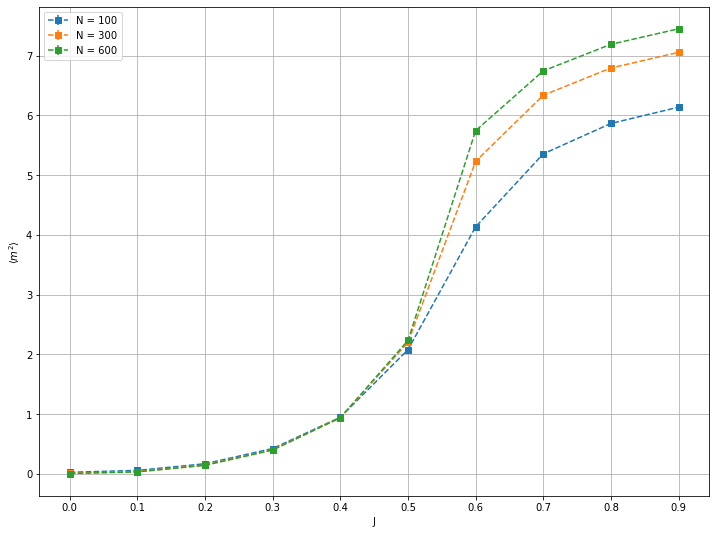

In [67]:
fig, ax = plt.subplots(figsize=(12,9))
Ns = full_data.N.unique()
for n in Ns:
    dataN = full_data[full_data.N == n]
    ax.errorbar(x='J', y='mean_e_sq', yerr='err_mean_e_sq', fmt='s--', data=dataN, label=f'N = {n}')

plt.xlabel('J')
plt.ylabel(r'$\langle m^2 \rangle$')
plt.legend();
plt.xticks(np.linspace(0,0.9,10));
plt.grid();

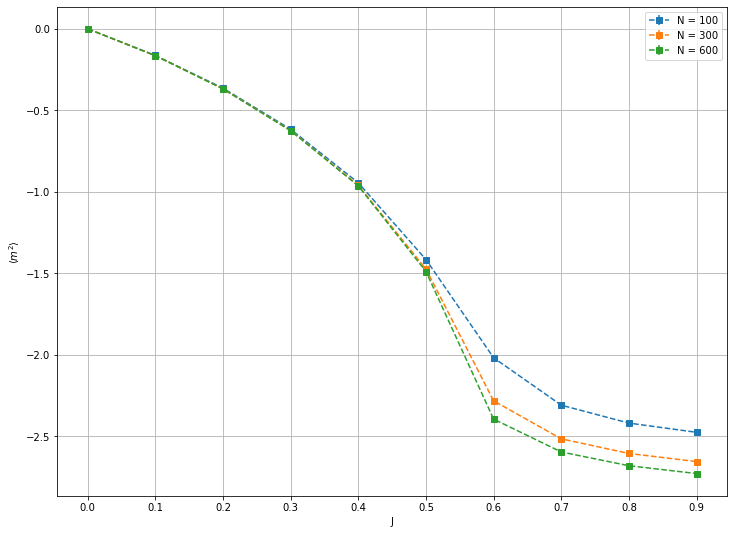

In [68]:
fig, ax = plt.subplots(figsize=(12,9))
Ns = full_data.N.unique()
for n in Ns:
    dataN = full_data[full_data.N == n]
    ax.errorbar(x='J', y='mean_e', yerr='err_mean_e', fmt='s--', data=dataN, label=f'N = {n}')

plt.xlabel('J')
plt.ylabel(r'$\langle m^2 \rangle$')
plt.legend();
plt.xticks(np.linspace(0,0.9,10));
plt.grid();